# Imports

In [1]:
import matplotlib.pyplot as plt

import logging

logging.basicConfig(level=logging.INFO)

In [2]:
import drawing
from kirkpatrick import Kirkpatrick, time_tests
from polygons import Point, Polygon, Triangle
from polygons import generate_random_tiling
from polygons import generate_triangle_tiling

%load_ext autoreload
%autoreload 2
%autoreload

%matplotlib inline

# Make a tiling

### You can generate a random tiling via the polygons library

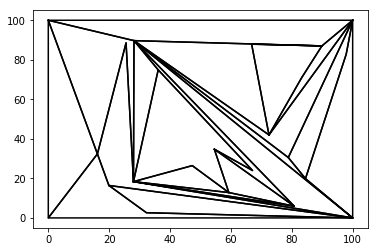

In [3]:
n_tiles = 20
size = 100

# Start with a square and construct the tiling inside
base = Polygon([Point(0, 0), Point(size, 0), Point(size, size), Point(0, size)])

# Iteratively split the polygon randomly 4 times to make tiles 
random_tiles = generate_random_tiling(base, n_iter=n_tiles - 1)

drawing.plot_polygons(random_tiles, 'k-')

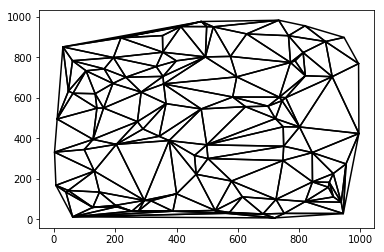

In [4]:
n_pts = 100
size = 1000

triangles = generate_triangle_tiling(num_pts=n_pts, size=size)

drawing.plot_polygons(triangles, 'k-')

### Or you can declare your own

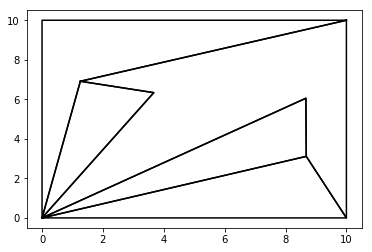

In [5]:
manual_tiles = [
    Polygon([
        Point(8.681595, 3.113523), Point(10.000000, 0.000000), Point(10.000000, 10.000000), 
        Point(1.258842, 6.913277), Point(3.670703, 6.336320), Point(0.000000, 0.000000),  
        Point(8.668625, 6.053702)
    ]), 
    Polygon([
        Point(10.000000, 10.000000), Point(0.000000, 10.000000), Point(0.000000, 0.000000), 
        Point(1.258842, 6.913277)
    ]), 
    Polygon([
        Point(1.258842, 6.913277), Point(0.000000, 0.000000), Point(3.670703, 6.336320)
    ]), 
    Polygon([
        Point(0.000000, 0.000000), Point(8.681595, 3.113523), Point(8.668625, 6.053702)
    ]), 
    Polygon([
        Point(0.000000, 0.000000), Point(10.000000, 0.000000), Point(8.681595, 3.113523)
    ])
]

drawing.plot_polygons(manual_tiles, 'k-')

# Instantiate the Point Locator

In [6]:
locator = Kirkpatrick(random_tiles)

# Make queries

### A valid query point will return the polygon containing it

Point(53.327310, 81.817528)
Polygon([Point(89.902620, 87.020213), Point(28.157664, 89.681518), Point(72.508569, 41.985814), Point(66.806895, 87.889285)])


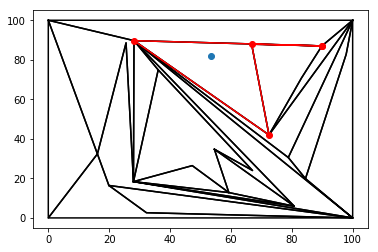

In [7]:
valid_query_point = Point.sample_square(100)
located_tile = locator.locate(valid_query_point)

print(valid_query_point)
print(located_tile)

drawing.plot_polygons(random_tiles, 'k-')
drawing.plot_polygon(located_tile, 'ro-')
drawing.plot_point(valid_query_point)

### A query point outside the tiling will return None

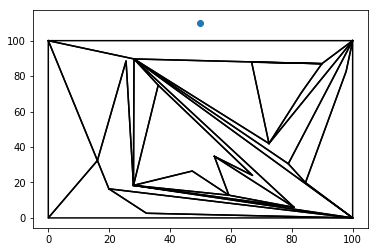

In [8]:
false_query_point = Point(100 / 2, 100 * 1.1)
located_tile = locator.locate(false_query_point)

drawing.plot_polygons(random_tiles, 'k-')
drawing.plot_polygon(located_tile, 'ro-')
drawing.plot_point(false_query_point)

# Even more visuals!

You have the power to even plot the algorithm as it runs!  The layers are saved in "layer%d.png", and the search layers are saved in "search_layer%d.png". Observe the following examples:

In [9]:
locator = Kirkpatrick(manual_tiles, plot_layers=True)

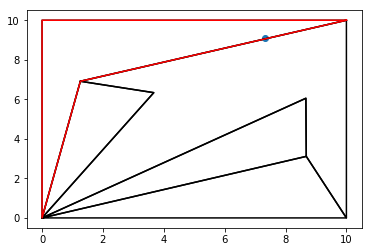

In [10]:
valid_query_point = Point.sample_square(10)
tile = locator.locate(valid_query_point, plot_search=True)
drawing.plot_polygons(manual_tiles, 'k-')
drawing.plot_polygon(tile, 'r-')
drawing.plot_point(valid_query_point)

# Timing

Verfiying that the query time is logarithmic seems to be quite difficult.  There is a method in polygons to generate  triangular tilings of reasonable size, but the amount of time taken to generate these tilings is *much* greater than the time to construct the Kirkpatrick object, or to locate the point.  Nevertheless, you can try it out yourself.

INFO:root:Running timing tests on point location


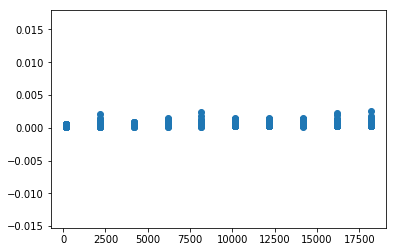

In [8]:
data_pts = time_tests(min_pts=100, max_pts=10000, inc=1000)
drawing.plot_points(data_pts)